# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
filtered_tips = tips[tips['tip_pct'] < .5 ]
filtered_tips = filtered_tips.reset_index(drop=True)

In [4]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', filtered_tips)
X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [5]:
y

DesignMatrix with shape (242, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [212 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [6]:
reg = sm.OLS(y,X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           8.79e-23
Time:                        13:52:16   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.446      0.000       0.590       1.529
sex[T.Female]     -0.0005      0.153     -0.003      0.997      -0.302       0.301
smoker[T.No]       0.2143      0.148      1.450      0.148      -0.077       0.505
time[T.Dinner]     0.0079      0.164      0.048      0.962      -0.315       0.331
net_bill           0.1058      0.009     11.483      0.000       0.088       0.124
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.889
Skew:                           0.682   Prob(JB):                     2.69e-13
Kurtosis:                       4.969   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De acordo com o modelo as variaveis Sex, Smoker e Time não são significantes por conta do P Value e vao ser removidas do modelo. após remover o R² do modelo não sofreu grandes alterações, provando que realmente elas eram pouco relevantes. 

### 1º Modelo

In [7]:
reg = smf.ols('tip ~ net_bill + 1', data = filtered_tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.41e-25
Time:                        13:52:16   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
filtered_tips['res_reg'] = reg.resid

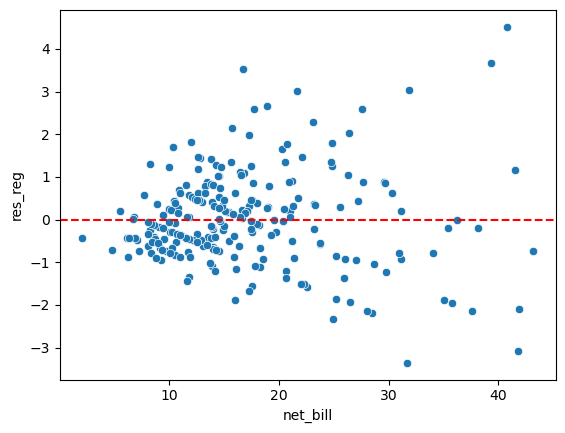

In [9]:
sns.scatterplot(x = 'net_bill', y = filtered_tips['res_reg'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

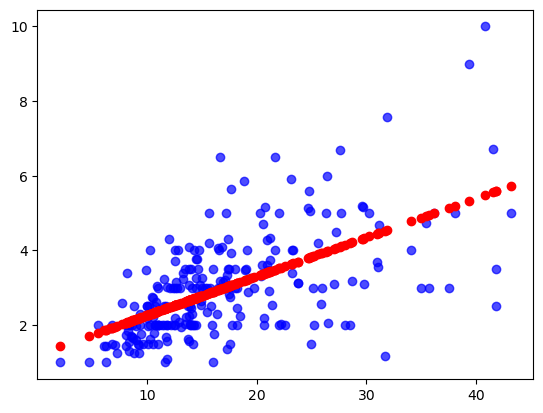

In [10]:
# Gráfico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], reg.fittedvalues, color='red') #predição

### 2ºModelo

In [11]:
reg_log = smf.ols('tip ~ np.log(net_bill) + 1', data = filtered_tips).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.13e-25
Time:                        13:52:16   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427     -4.651      0.000      -2.826      -1.144
np.log(net_bill)     1.8248      0.155     11.808      0.000       1.520       2.129
==============================================================================
Omnibus:                       46.523   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.909
Skew:                           0.881   Prob(JB):                     3.04e-25
Kurtosis:                       5.844   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
filtered_tips['res_reg_log'] = reg_log.resid

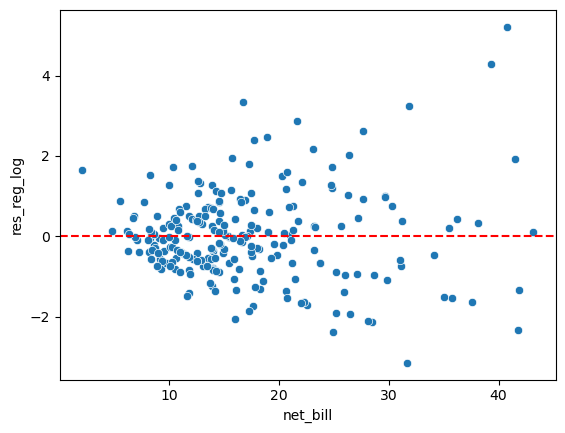

In [13]:
sns.scatterplot(x = 'net_bill', y = filtered_tips['res_reg_log'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

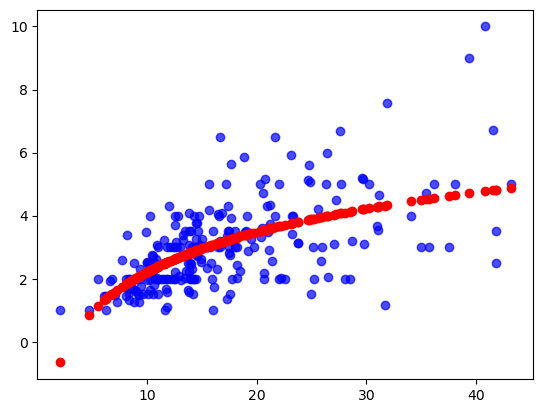

In [14]:
# Gráfico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], reg_log.fittedvalues, color='red') #predição

### 3º Modelo

In [15]:
reg_power = smf.ols('tip ~ net_bill + np.power(net_bill,2) + 1', data = filtered_tips).fit()
reg_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     70.98
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           6.36e-25
Time:                        13:52:16   Log-Likelihood:                -364.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     239   BIC:                             745.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6297      0.358      1.757      0.080      -0.076       1.336
net_bill                  0.1716      0.037      4.618      0.000       0.098       0.245
np.power(net_bill, 2)    -0.0016      0.001     -1.863      0.064      -0.003    8.93e-05
==============================================================================
Omnibus:                       37.043   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.736
Skew:                           0.727   Prob(JB):                     6.56e-19
Kurtosis:                       5.488   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
filtered_tips['res_reg_power'] = reg_power.resid

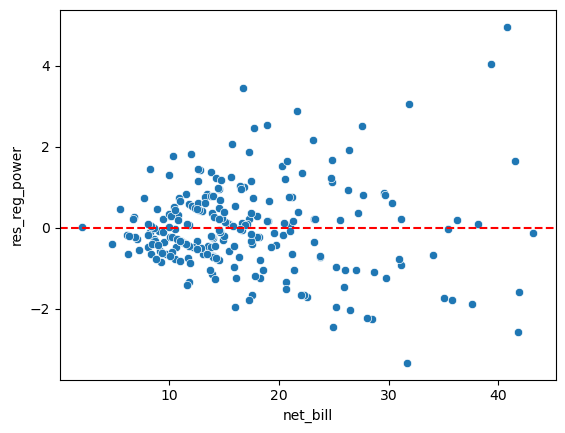

In [17]:
sns.scatterplot(x = 'net_bill', y = filtered_tips['res_reg_power'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

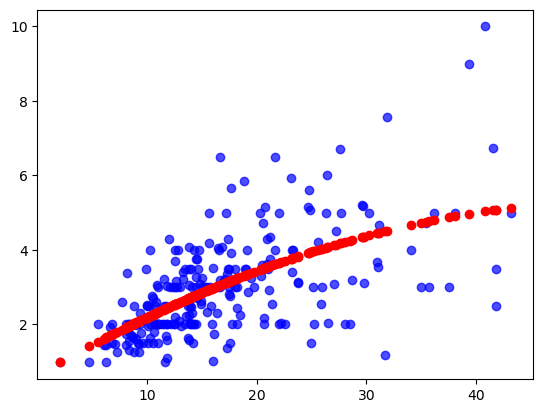

In [18]:
# Gráfico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], reg_power.fittedvalues, color='red') #predição

### O Melhor modelo seria o terceiro, poém ele ainda não é o ideal, os dados precisam de mais ajuste. 

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [19]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', filtered_tips)
X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [20]:
y

DesignMatrix with shape (242, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [212 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [21]:
reg2 = sm.OLS(y,X).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     31.32
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           6.07e-21
Time:                        13:52:17   Log-Likelihood:                -90.268
No. Observations:                 242   AIC:                             190.5
Df Residuals:                     237   BIC:                             208.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4070      0.076      5.321      0.000       0.256       0.558
sex[T.Female]      0.0047      0.049      0.096      0.923      -0.092       0.101
smoker[T.No]       0.0668      0.047      1.408      0.160      -0.027       0.160
time[T.Dinner]     0.0031      0.053      0.058      0.954      -0.101       0.107
net_bill           0.0323      0.003     10.926      0.000       0.026       0.038
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.073
Skew:                          -0.298   Prob(JB):                        0.130
Kurtosis:                       3.221   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1º modelo

In [22]:
reg2 = smf.ols('np.log(tip) ~ net_bill + 1', data = filtered_tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     123.8
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.82e-23
Time:                        13:52:17   Log-Likelihood:                -91.279
No. Observations:                 242   AIC:                             186.6
Df Residuals:                     240   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4604      0.053      8.617      0.000       0.355       0.566
net_bill       0.0318      0.003     11.128      0.000       0.026       0.037
==============================================================================
Omnibus:                        5.775   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.480
Skew:                          -0.354   Prob(JB):                       0.0646
Kurtosis:                       3.204   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
filtered_tips['res2_reg'] = reg2.resid

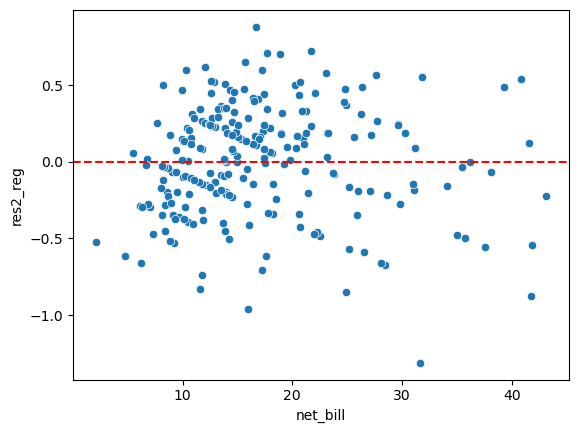

In [24]:
sns.scatterplot(x = 'net_bill', y = filtered_tips['res2_reg'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

### 2º Modelo

In [25]:
reg2_log = smf.ols('np.log(tip) ~ np.log(net_bill) + 1', data = filtered_tips).fit()
reg2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     157.4
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           4.20e-28
Time:                        13:52:17   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)     0.5973      0.048     12.547      0.000       0.504       0.691
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

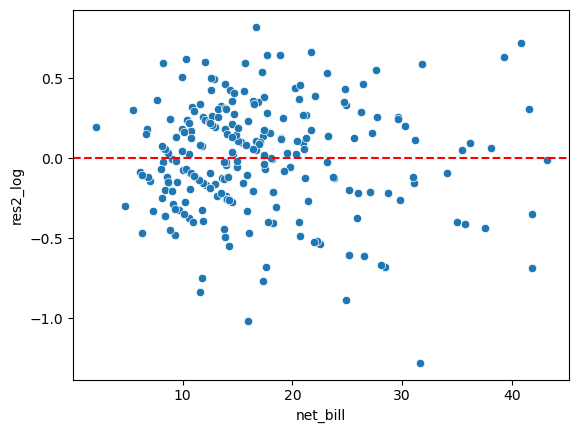

In [26]:
filtered_tips['res2_log'] = reg2_log.resid

sns.scatterplot(x = 'net_bill', y = filtered_tips['res2_log'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

### 3º modelo

In [27]:
reg2_power = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2) + 1', data = filtered_tips).fit()
reg2_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     75.99
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.86e-26
Time:                        13:52:17   Log-Likelihood:                -82.063
No. Observations:                 242   AIC:                             170.1
Df Residuals:                     239   BIC:                             180.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0303      0.112      0.271      0.786      -0.189       0.250
net_bill                  0.0807      0.012      6.976      0.000       0.058       0.103
np.power(net_bill, 2)    -0.0011      0.000     -4.349      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        9.395   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.950
Skew:                          -0.390   Prob(JB):                      0.00691
Kurtosis:                       3.614   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

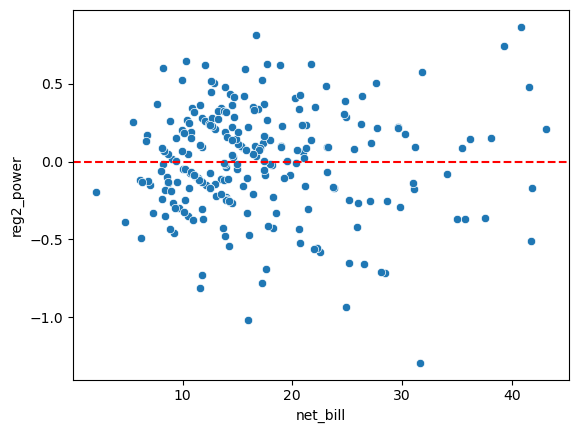

In [28]:
filtered_tips['reg2_power'] = reg2_power.resid

sns.scatterplot(x = 'net_bill', y = filtered_tips['reg2_power'], data = filtered_tips)
plt.axhline(y=0, color='r', linestyle='--')

O Melhor modelo é o segundo, tem melhor R² e pouca diferença de resíduo.

In [29]:
# Aqui vamos calcular o R² ajustando para o modelo original, temos que elevar a e
filtered_tips['pred'] = np.exp(reg2_log.fittedvalues)
#fazendo o quadrado da correlação temos o R²
filtered_tips[['pred', 'tip']].corr().iloc[0,1]**2

0.37371201654910396

## O modelo 3 tem o melhor R², utilizando Log nós tiramos a tendencia de cone do resíduo, provavelmente a resposta tem correlação multiplicatica com a variavel explicativa. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
df = pd.read_csv('previsao_de_renda.csv')

In [31]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [32]:
# Vamos verificar como esta o df e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [33]:
# Ha linhas com valor zero?
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [34]:
# Vamos avaliar porque o tempo no trabalho tem tantos 0
df['tempo_emprego'].unique

<bound method Series.unique of 0         6.602740
1         7.183562
2         0.838356
3         4.846575
4         4.293151
           ...    
14995    13.887671
14996          NaN
14997     7.832877
14998     4.298630
14999     7.219178
Name: tempo_emprego, Length: 15000, dtype: float64>

In [35]:
# parece que existem valores nulos que não fazem muito sentido, ja que é possivel ter números decimais no campo, vamos excluir os 0.
df = df.dropna()
#vamos remover algumas colunas. 
df = df.drop(['Unnamed: 0','data_ref','id_cliente'], axis=1)

In [36]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [219]:
reg = smf.ols('renda ~ tempo_emprego+ 1', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:53:54   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
df['reg_res'] = reg.resid

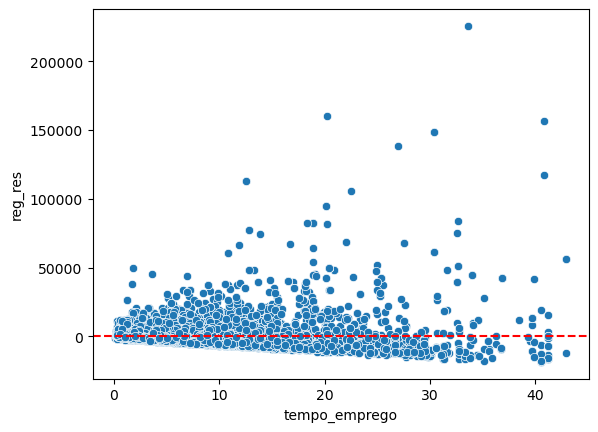

In [223]:
sns.scatterplot(x = 'tempo_emprego', y = df['reg_res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

O modelo tem o resido ruim, ele esta com padrão cone, vamos arrumar utilizando Log na variavel X.

In [224]:
reg_df = smf.ols('np.log(renda) ~ tempo_emprego + 1', data = df).fit()
reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:54:52   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
df['reg_df_res'] = reg_df.resid

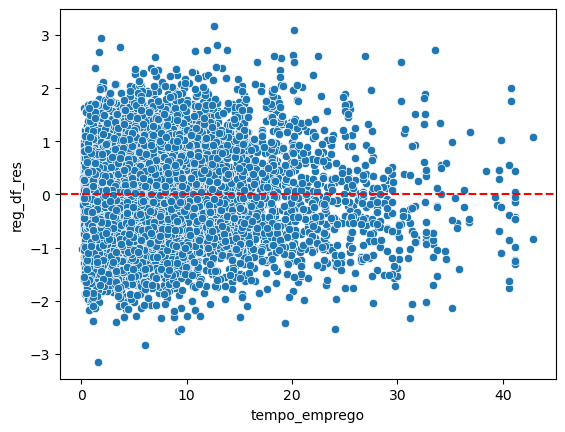

In [226]:
sns.scatterplot(x = 'tempo_emprego', y = df['reg_df_res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

### Idealmente o deveríamos tirar outliers, seria util para remover alguns "ricos" e prever a maioria da pupolação.

# 2º Modelo

In [208]:
reg_df_full = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia + 1', data = df).fit()
reg_df_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1312.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:49:30   Log-Likelihood:                -13682.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12421   BIC:                         2.742e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2198      0.039    186.234      0.000       7.144       7.296
sexo[T.M]                   0.7864      0.014     56.843      0.000       0.759       0.813
posse_de_imovel[T.True]     0.0887      0.014      6.428      0.000       0.062       0.116
idade                       0.0046      0.001      6.085      0.000       0.003       0.006
tempo_emprego               0.0609      0.001     59.037      0.000       0.059       0.063
qt_pessoas_residencia       0.0185      0.007      2.566      0.010       0.004       0.033
==============================================================================
Omnibus:                        1.184   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.162
Skew:                           0.023   Prob(JB):                        0.559
Kurtosis:                       3.014   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Agora com o nosso modelo com somente com as variaveis que tem chance baixa da hipotese zero vamos analisar a dispersão.

In [205]:
df['reg_df_res_full'] = reg_df_full.resid

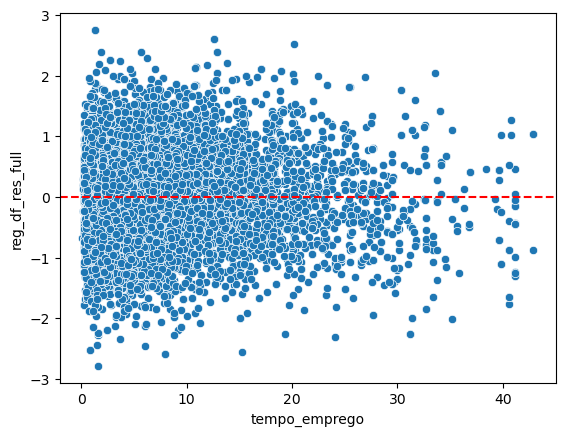

In [206]:
sns.scatterplot(x = 'tempo_emprego', y = df['reg_df_res_full'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

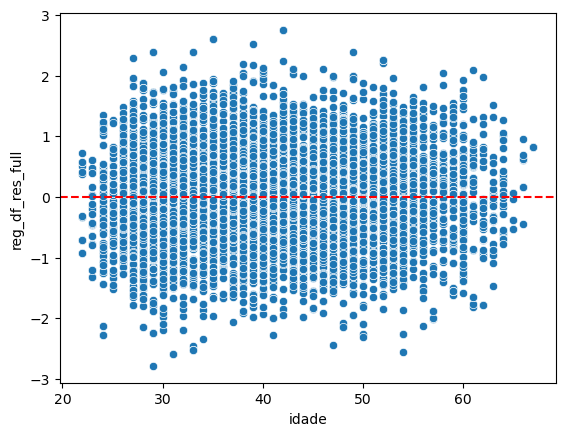

In [209]:
sns.scatterplot(x = 'idade', y = df['reg_df_res_full'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

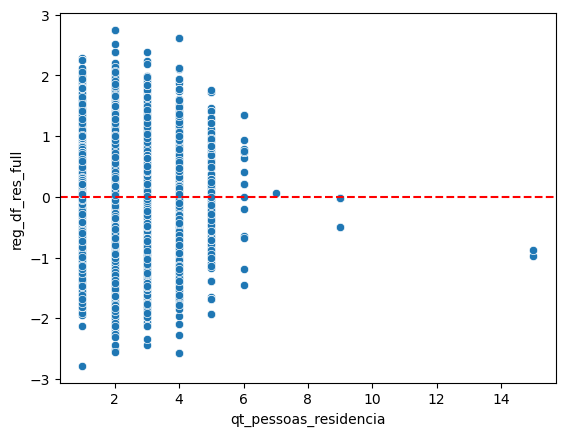

In [215]:
sns.scatterplot(x = 'qt_pessoas_residencia', y = df['reg_df_res_full'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='posse_de_imovel', ylabel='reg_df_res_full'>

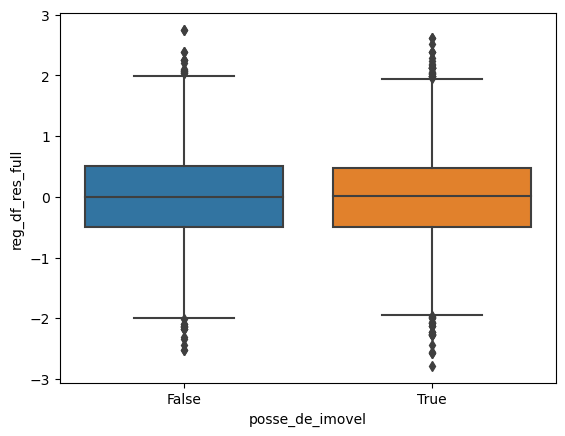

In [213]:
sns.boxplot(x = 'posse_de_imovel', y = 'reg_df_res_full', data = df)

<AxesSubplot:xlabel='sexo', ylabel='reg_df_res_full'>

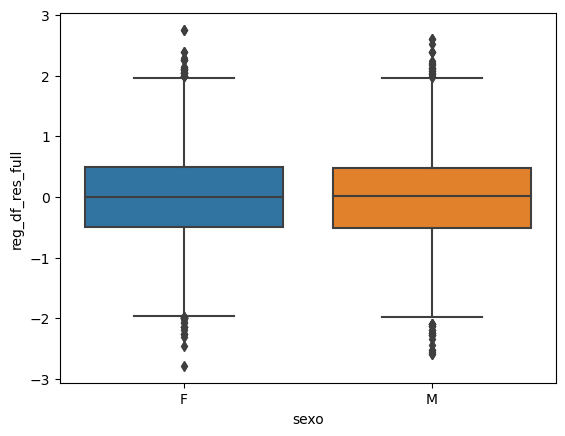

In [214]:
sns.boxplot(x = 'sexo', y = 'reg_df_res_full', data = df)

Todas as variaveis mantidas tem aleatoriedade de variancia, residuo suficiente para serem consideradas, bem como seu P -value abaixo de 5%, deixando a hipotese nula pouco provavél, umas segunda analise seria tranformar a variável pessoas na casa em categórica. 